In [9]:

import numpy as np 
import pandas as pd
import math
import sklearn 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [10]:
X,y = make_circles(900, factor=0.2, noise=0.2) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2020)

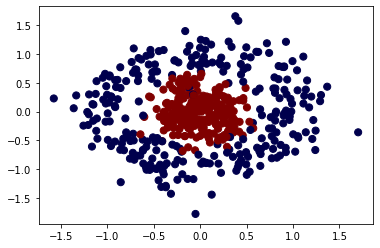

In [11]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, s=50, cmap='seismic')
plt.show()

In [36]:
r = np.exp(-(X_train**2).sum(1))

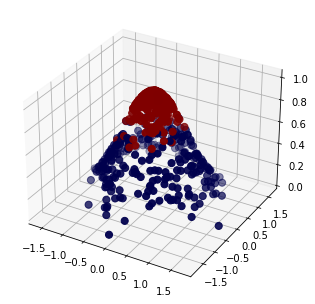

In [37]:

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], r, c=y_train, s=50, cmap='seismic')

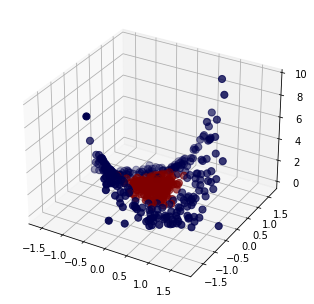

In [30]:
r1 = (X_train[:,0] * X_train[:,1]+1)**3

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], r1, c=y_train, s=50, cmap='seismic')

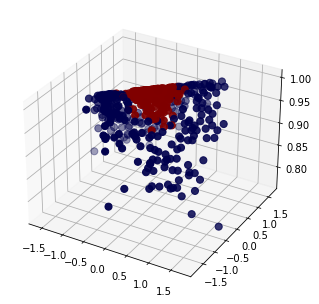

In [32]:
r2 = np.exp(-((X_train[:,0] - X_train[:,1])**2)/16)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], r2, c=y_train, s=50, cmap='seismic')

In [14]:
lsvc = LinearSVC( )
lsvc.fit(X_train, y_train)
probs= lsvc.predict(X_test)
print('Accuracy:'+str(accuracy_score(y_test, probs)))

Accuracy:0.4861111111111111


In [15]:
Zl = lsvc.decision_function(X_train)

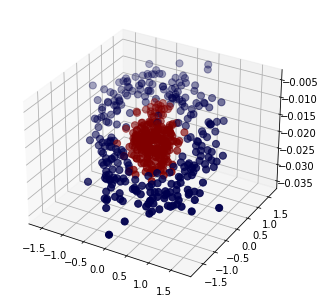

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], Zl, c=y_train, s=50, cmap='seismic')

In [38]:
nusvc = svm.NuSVC(gamma='auto', kernel = "rbf")

# svc = SVC(kernel="poly", probability=True, random_state=0)
nusvc.fit(X_train, y_train)
probs= nusvc.predict(X_test)
print('Accuracy:'+str(accuracy_score(y_test, probs)))

Accuracy:0.9527777777777777


In [39]:
Z = nusvc.decision_function(X_train)


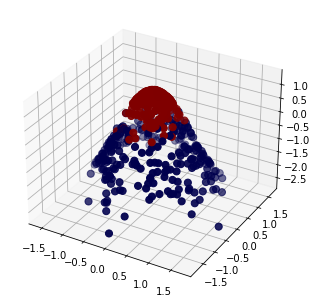

In [40]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], Z, c=y_train, s=50, cmap='seismic')

In [68]:
cvc_0 = svm.SVC()
cvc_0.fit(X_train, y_train)
probs= cvc.predict(X_test)
print('Accuracy:'+str(accuracy_score(y_test, probs)))

Accuracy:0.9472222222222222


In [102]:
cvc_0.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [76]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
cvc_best_grid = GridSearchCV(cvc_0, param_grid)

In [77]:
grid = GridSearchCV(cvc, param_grid2,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.00

[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['sigmoid']}],
             verbose=2)

In [78]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.001)


In [91]:
cvc_best_grid.fit(X_train, y_train)
probs= cvc_best_grid.predict(X_test)
print('Accuracy:'+str(accuracy_score(y_test, probs)))

Accuracy:0.9555555555555556


In [100]:
Zc = cvc_best_grid.decision_function(X_train)

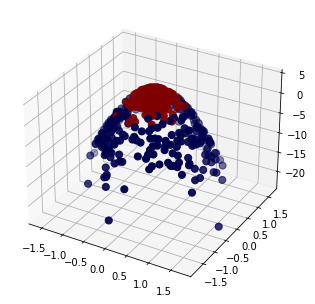

In [101]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], Zc, c=y_train, s=50, cmap='seismic')